# Lending Club Loan

Lending Club es una compañía estadounidense de préstamo entre particulares, con sede en San Francisco (California).

Para empresas como Lending Club, es muy importante predecir correctamente si un préstamo será moroso o no. En este proyecto, utilizando los datos históricos de 2007 a 2015, se va a construir un modelo de aprendizaje profundo para predecir la posibilidad de incumplimiento de préstamos futuros.

A continuación se presenta la metodología que se va a seguir para llevar a cabo la tarea:




1. Data Exploration:

Visualizamos los datos y el significado de cada una de las columnas

2. Feature Engineering 

Hacemos que todos los datos sean numéricos, igualamos las dos poblaciones, vemos las correlaciones que existen entre los datos, evaluamos el skewness de las columnas y las modificamos para adaptarlas a una distribucion normal

3. Dividimos los datos

Hacemos un conjunto de datos de train, validation y test

4. Modelo

Desarrollamos un modelo de Deep Learning

5. Resultados

Evaluamos los resultados obtenidos por el modelo

Link de los datos https://www.kaggle.com/datasets/urstrulyvikas/lending-club-loan-data-analysis/data

________________

## 1. Data Exploration:


In [22]:
import pandas as pd 

In [23]:
df=pd.read_csv('./lending_bien/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


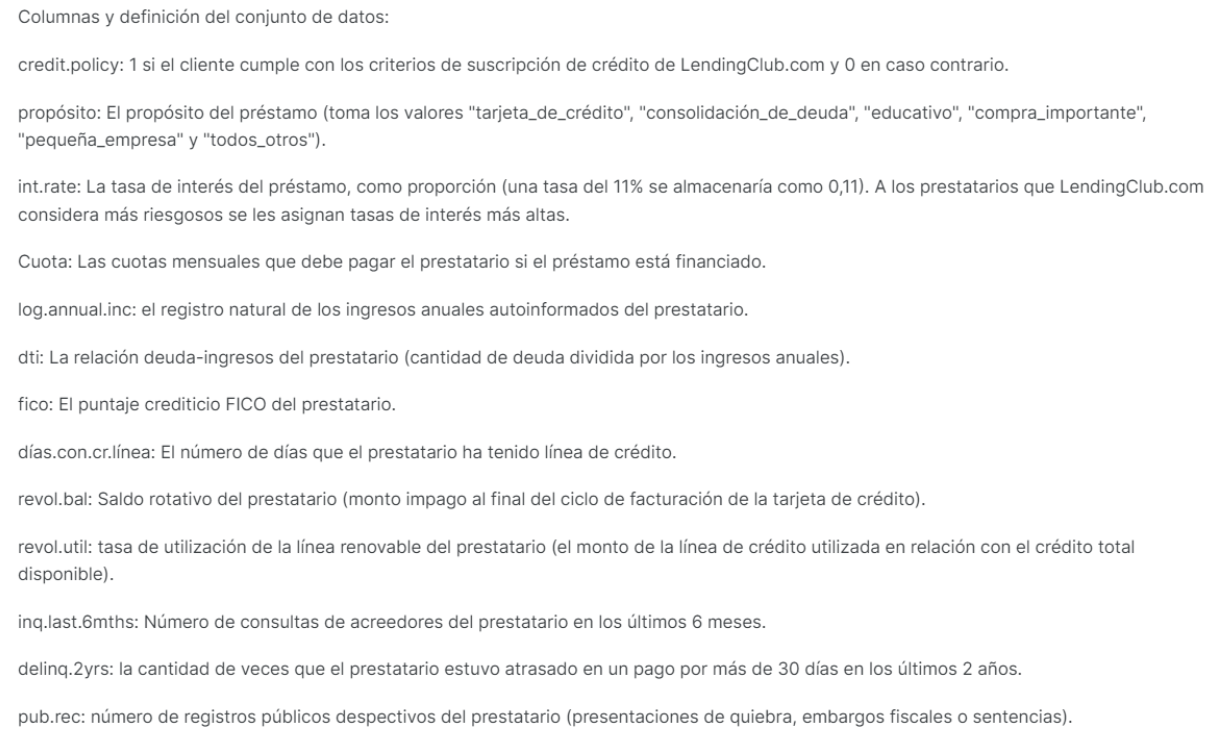

In [4]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

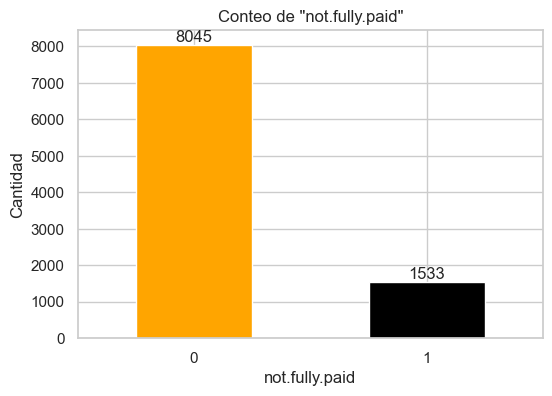

In [6]:
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura según sea necesario

# Calcula el conteo de cada clase
value_counts = df['not.fully.paid'].value_counts()

# Crea la gráfica de barras
ax = value_counts.plot(kind='bar', color=['orange', 'black'])

# Agrega los números encima de cada barra
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.title('Conteo de "not.fully.paid"')
plt.xlabel('not.fully.paid')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Ajusta el ángulo de las etiquetas del eje x si es necesario
plt.show()


<Figure size 1000x600 with 0 Axes>

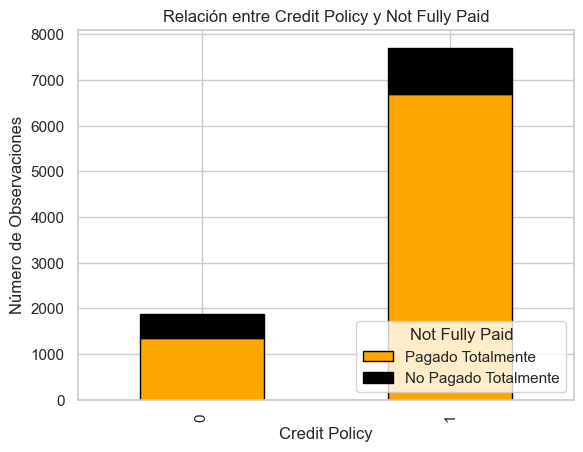

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tus datos están en un DataFrame llamado 'df'
# Si aún no has cargado tus datos, puedes hacerlo con pd.read_csv('nombre_del_archivo.csv')

# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Contar el número de observaciones para cada combinación de credit.policy y not.fully.paid
cp_not_paid_counts = pd.crosstab(df['credit.policy'], df['not.fully.paid'])

# Graficar
cp_not_paid_counts.plot(kind='bar', stacked=True, color=['orange', 'black'], edgecolor='black')
plt.title('Relación entre Credit Policy y Not Fully Paid')
plt.xlabel('Credit Policy')
plt.ylabel('Número de Observaciones')
plt.legend(title='Not Fully Paid', loc='lower right', labels=['Pagado Totalmente', 'No Pagado Totalmente'])
plt.show()


<Figure size 1400x800 with 0 Axes>

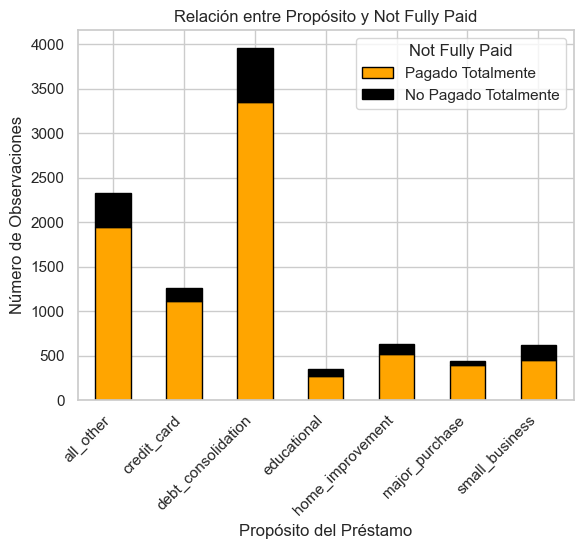

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tus datos están en un DataFrame llamado 'df'
# Si aún no has cargado tus datos, puedes hacerlo con pd.read_csv('nombre_del_archivo.csv')

# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Contar el número de observaciones para cada combinación de purpose y not.fully.paid
purpose_not_paid_counts = pd.crosstab(df['purpose'], df['not.fully.paid'])

# Graficar
purpose_not_paid_counts.plot(kind='bar', stacked=True, color=['orange', 'black'], edgecolor='black')
plt.title('Relación entre Propósito y Not Fully Paid')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Número de Observaciones')
plt.legend(title='Not Fully Paid', loc='upper right', labels=['Pagado Totalmente', 'No Pagado Totalmente'])
plt.xticks(rotation=45, ha='right')  # Ajustar las etiquetas del eje x para mayor legibilidad
plt.show()


Hay pocas muestras de gente morosa por lo que tendremos que igualar las poblaciones de alguna forma

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


_______

## 2. Feature Engineering

A continuación, primero hacemos que todos los datos proporcionados sean numéricos

In [24]:
mapping_dict = {
    'debt_consolidation': 0,
    'all_other': 1,
    'credit_card': 2,
    'home_improvement': 3,
    'small_business': 4,
    'major_purchase': 5,
    'educational': 6


}
df['purpose'] = df['purpose'].map(mapping_dict)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,1,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,1,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


EQUILIBRAMOS LOS DATOS 

Probé diferentes técnicas para igualar las poblaciones pero la que mejor resultados me da es con resample.

Empleando SMOTE me quedaba estancado en un accuracy de entorno 0.7


In [8]:
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 14)
not_fully_paid_1 (1533, 14)


In [9]:
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
df = pd.concat([not_fully_paid_0, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df)

In [10]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1772,1,4,0.1316,253.28,10.491274,21.50,702,1560.041667,1478,12.2,0,0,0,1
4606,1,0,0.1148,468.16,11.264464,23.17,727,4200.958333,31236,42.3,1,0,0,0
222,1,4,0.1154,659.91,11.472103,17.81,707,3629.000000,93,0.0,2,0,0,1
3987,1,0,0.1316,371.48,10.915016,7.62,682,2669.958333,10756,69.8,0,0,0,0
679,1,2,0.1640,636.39,11.918391,24.03,672,4290.041667,28846,57.9,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1,4,0.1095,490.71,11.608236,1.07,762,4290.041667,3889,18.3,0,0,0,1
6905,1,0,0.1426,521.45,10.668955,17.19,702,4051.000000,18944,97.6,2,0,0,1
3738,1,6,0.1284,282.40,11.451050,22.54,682,3990.000000,65621,81.5,1,0,0,1
956,1,0,0.1292,252.42,10.985293,18.81,672,3889.000000,12195,58.9,3,0,1,1


Separamos entre datos categoricos y datos numericos

In [11]:
data_cat=df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "not.fully.paid"]]

In [12]:
data_num=df[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "revol.util"]] # aqui quito not_fully_paid

Visualizamos las correlaciones que existen entre los datos para evaluar si hay columnas muy correladas

<Axes: >

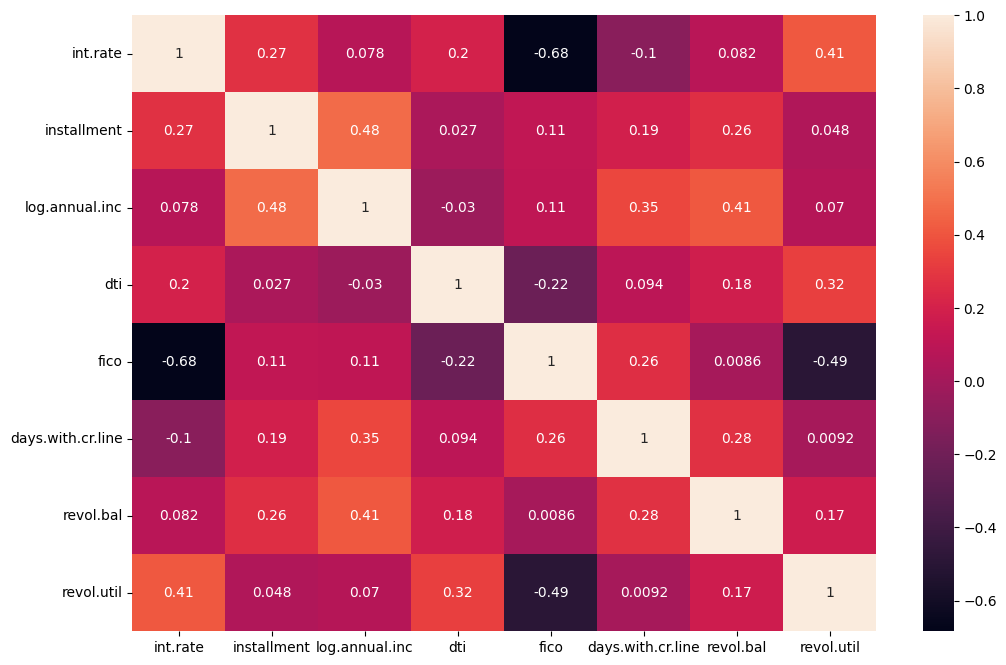

In [13]:

import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(data_num.corr(), annot=True)

<Axes: >

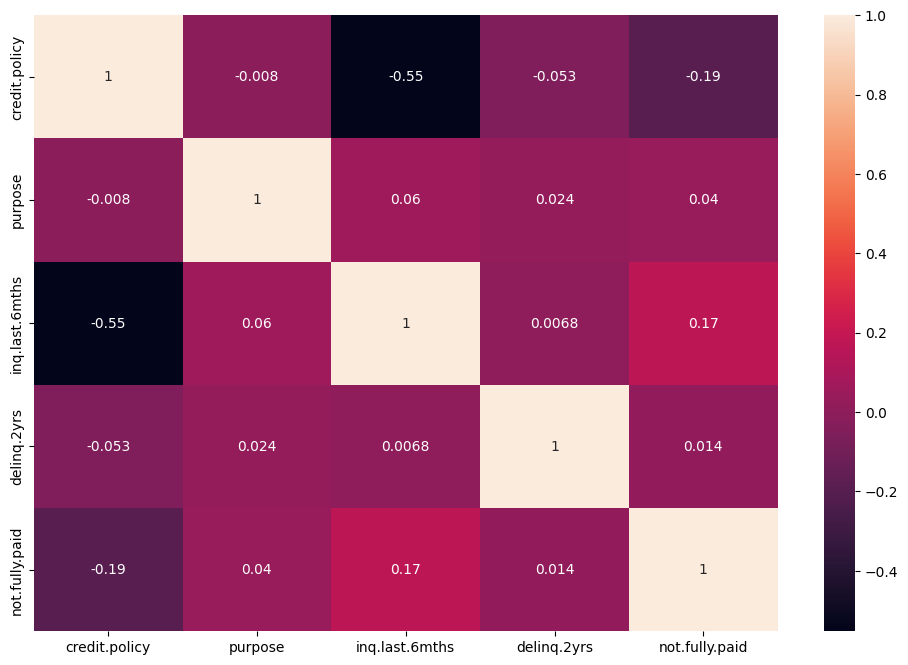

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(data_cat.corr(), annot=True)

<Axes: >

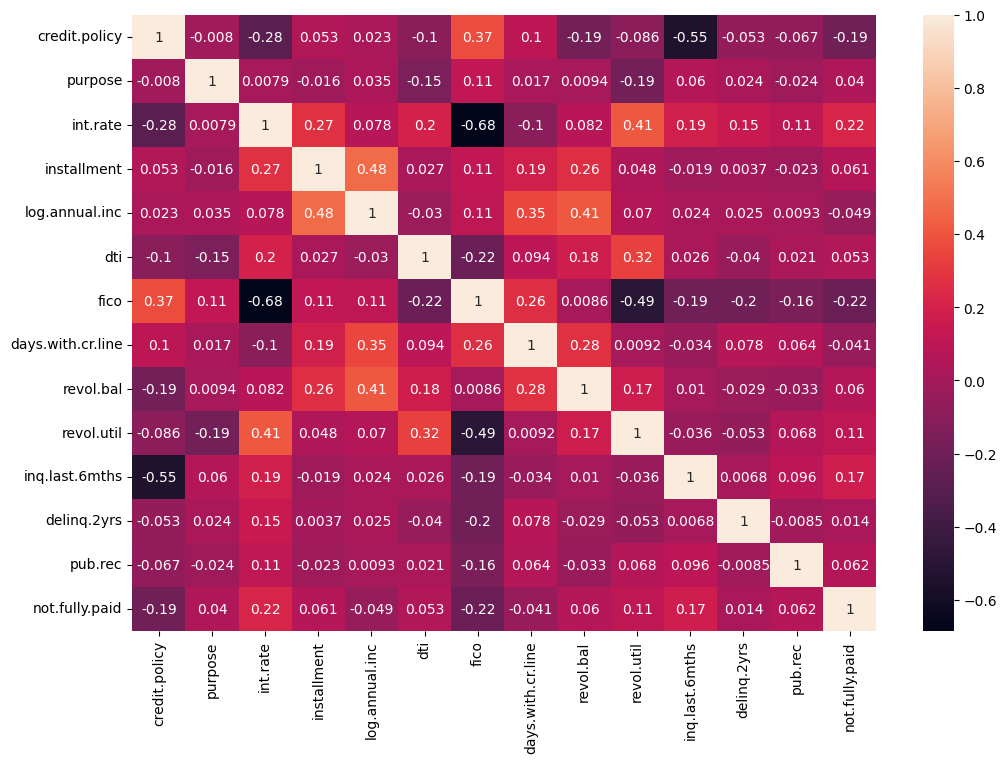

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

Considero que no hay ninguna columna muy correlada con otra y aunque tengo columnas que no tienen mucha relacion lineal con el target que es la columna not.fully.paid, las considerare todas

A continuación muestro el histograma de todas las columnas numericas para ver como estan distribuidas

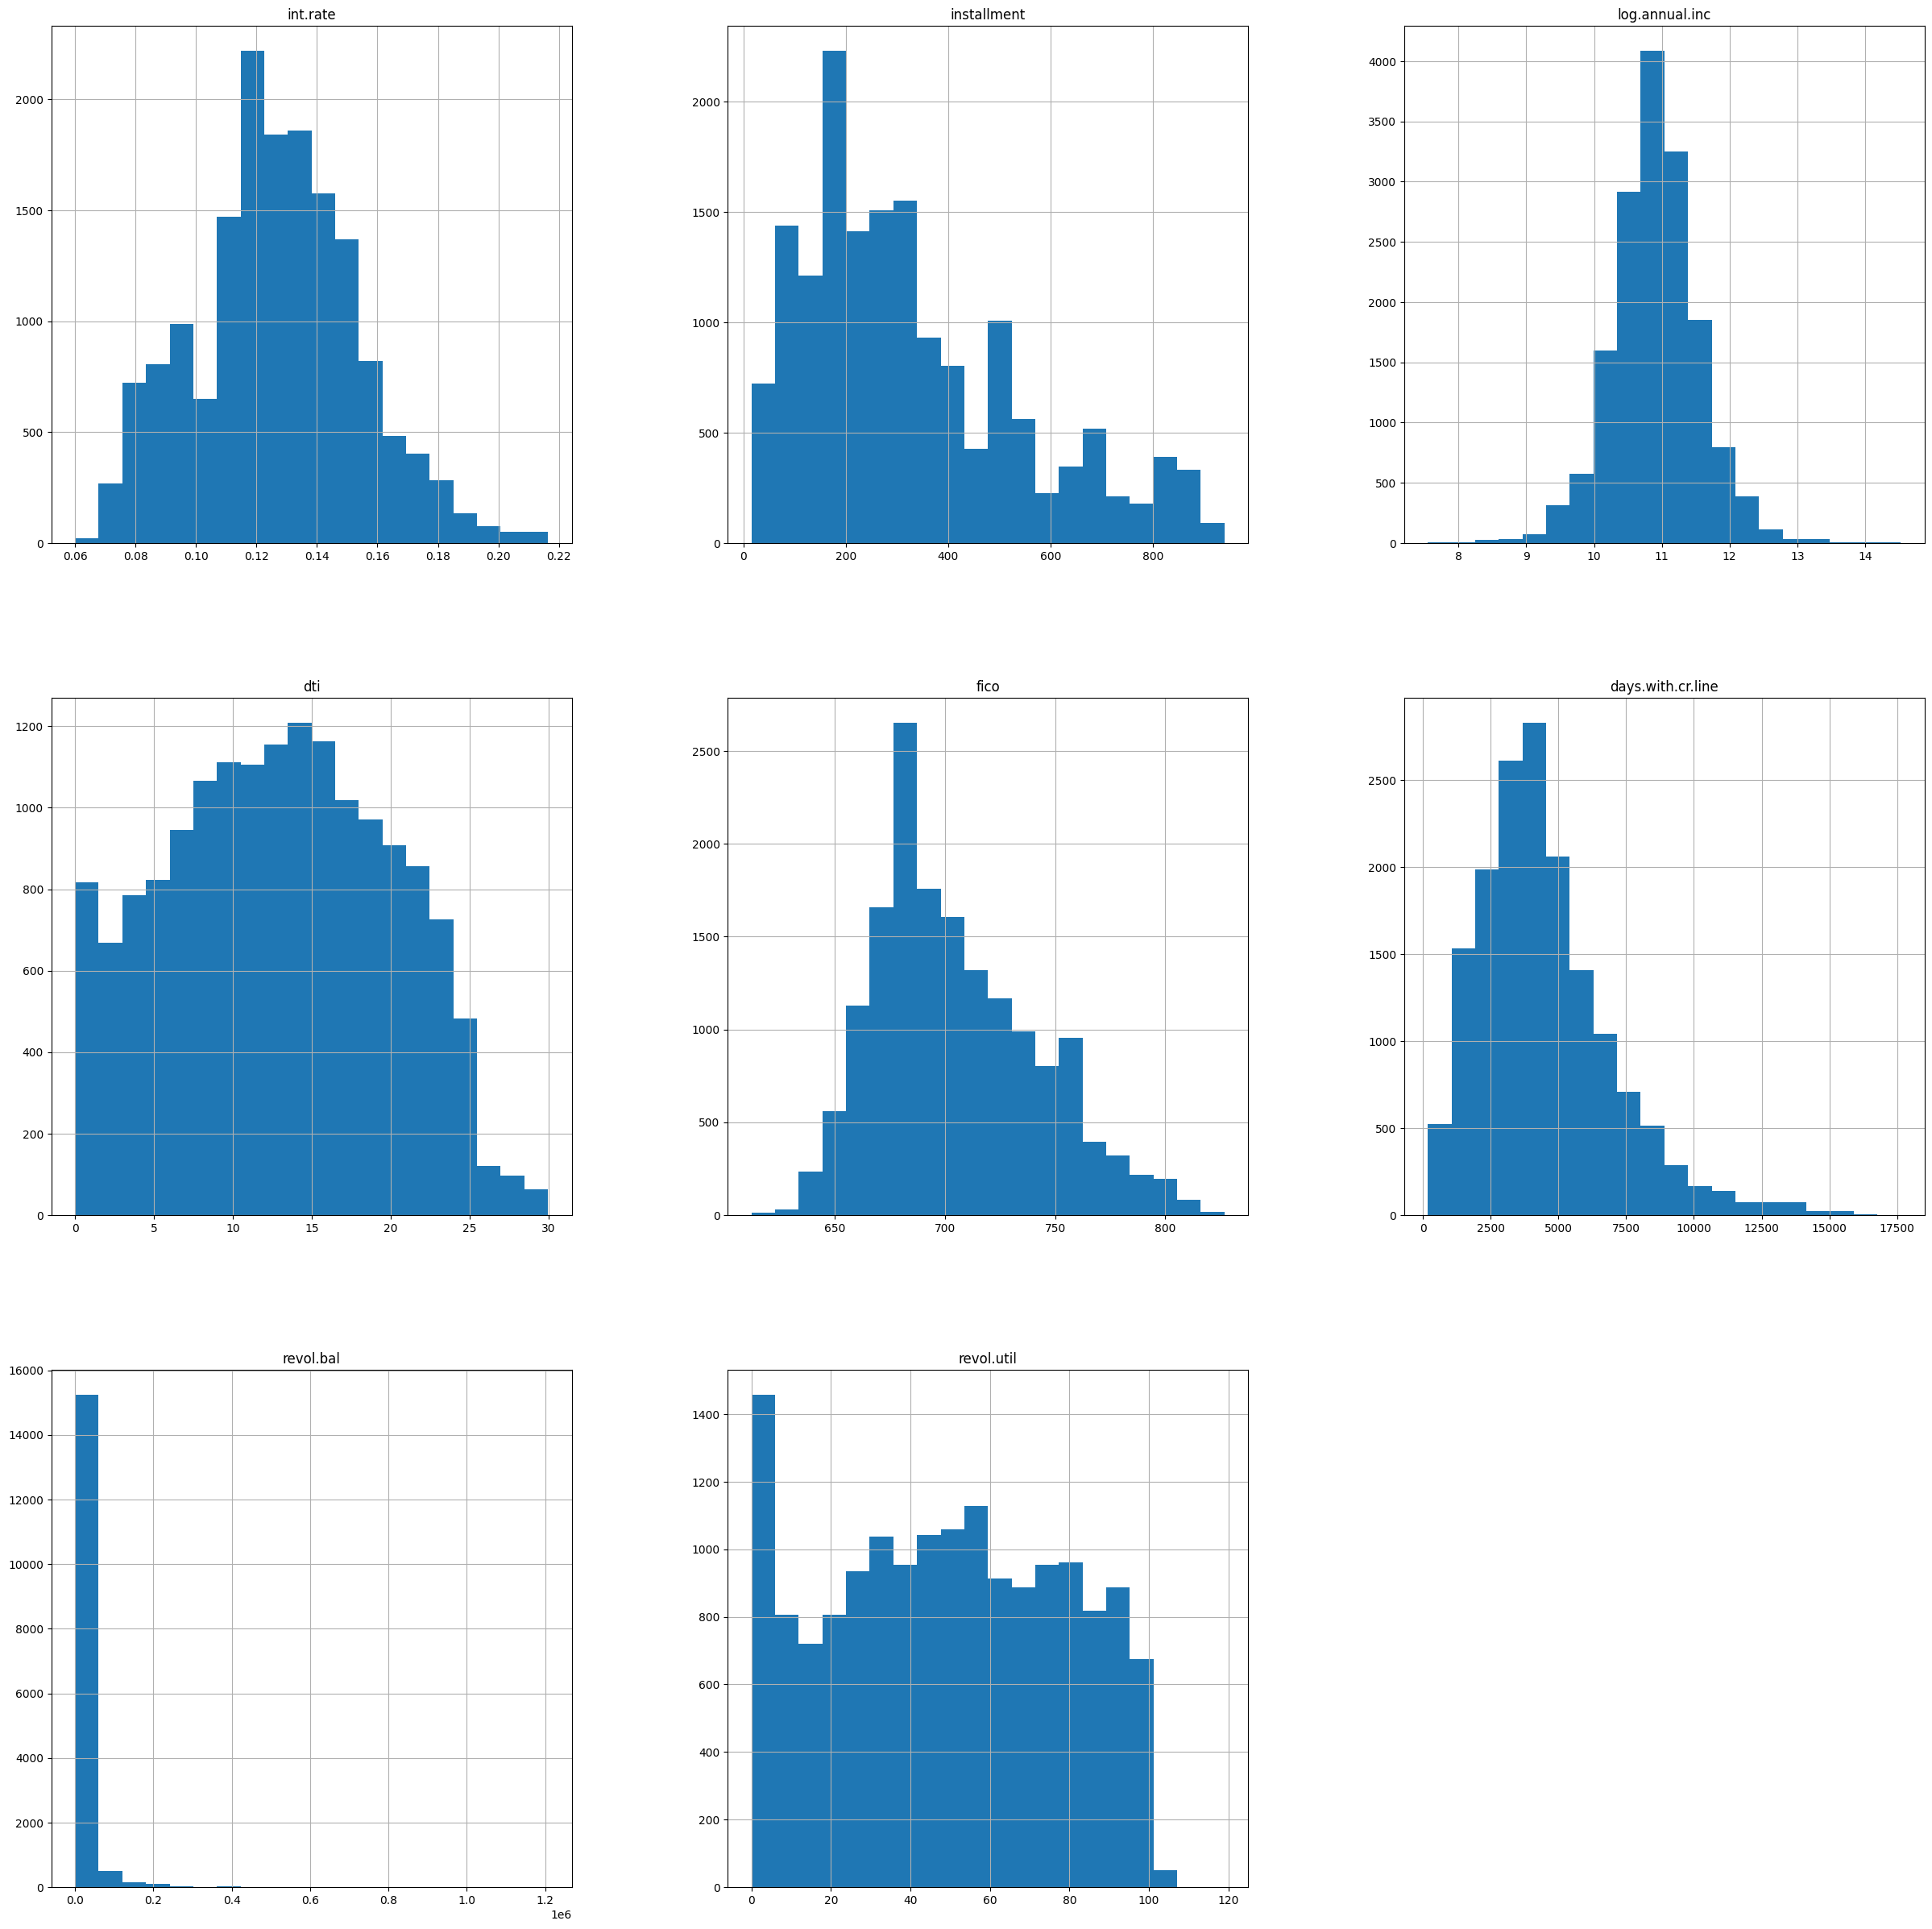

In [16]:
data_num.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

A continuacion vamos a valorar la asimetria de cada columna

In [17]:
from scipy.stats import skew

vars_skewed = data_num.apply(lambda x: skew(x)).sort_values(ascending = False)
vars_skewed

revol.bal            9.343049
days.with.cr.line    1.141846
installment          0.889286
fico                 0.577189
int.rate             0.164127
log.annual.inc       0.028021
dti                  0.018250
revol.util          -0.022412
dtype: float64

Vamos a corregir las asimetrias mayores de 0,3 

In [18]:
high_skew = vars_skewed[abs(vars_skewed) > 0.3]
high_skew

revol.bal            9.343049
days.with.cr.line    1.141846
installment          0.889286
fico                 0.577189
dtype: float64

In [19]:
high_skew.index

Index(['revol.bal', 'days.with.cr.line', 'installment', 'fico'], dtype='object')

In [20]:
import numpy as np
for feat in high_skew.index:
    df[feat] = np.log1p(df[feat])

_________

## 3. Distribuimos los datos

A continuación dividimos los datos en train, validation y test y posteriormente estandarizamos utilizando standardscaler

In [26]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,1,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,1,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [27]:
X = df.iloc[:,0:-1]
        
y = df['not.fully.paid']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

__________

## 4. Modelo 

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val= sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [26]:
import keras

model  = keras.Sequential(
    [
        keras.layers.Dense(
        256, activation="relu", input_shape=[13]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 135425 (529.00 KB)
Trainable params: 135

In [27]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [28]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=250,
    epochs=500,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/500




42/42 [==============================] - 2s 24ms/step - loss: 0.6559 - binary_accuracy: 0.6067 - val_loss: 0.6172 - val_binary_accuracy: 0.6423
Epoch 2/500
42/42 [==============================] - 1s 15ms/step - loss: 0.6361 - binary_accuracy: 0.6322 - val_loss: 0.6139 - val_binary_accuracy: 0.6435
Epoch 3/500
42/42 [==============================] - 1s 15ms/step - loss: 0.6300 - binary_accuracy: 0.6396 - val_loss: 0.6068 - val_binary_accuracy: 0.6586
Epoch 4/500
42/42 [==============================] - 1s 16ms/step - loss: 0.6182 - binary_accuracy: 0.6569 - val_loss: 0.6048 - val_binary_accuracy: 0.6621
Epoch 5/500
42/42 [==============================] - 1s 16ms/step - loss: 0.6115 - binary_accuracy: 0.6584 - val_loss: 0.5988 - val_binary_accuracy: 0.6781
Epoch 6/500
42/42 [==============================] - 1s 16ms/step - loss: 0.6034 - binary_accuracy: 0.6720 - val_loss: 0.5982 - val_binary_accuracy: 0.6683
Epoch 7/500
42/42 [==============================] - 1s 16ms/step - loss: 

_________

## 5. Resultados

In [29]:
y_pred =(model.predict(X_test)>0.5).astype("int32")
              
y_pred

101/101 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.870105655686762

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1613
           1       0.83      0.92      0.88      1605

    accuracy                           0.87      3218
   macro avg       0.87      0.87      0.87      3218
weighted avg       0.87      0.87      0.87      3218



Nos dan buenos resultados por lo que guardamos el modelo con un pickle

In [32]:
import pickle

# Supongamos que history es tu historial de entrenamiento
with open('historial_entrenamiento6.pkl', 'wb') as archivo:
    pickle.dump(history.history, archivo)


Para voler a traer el modelo

In [13]:
import pickle

with open('historial_entrenamiento6.pkl', 'rb') as archivo:
    history = pickle.load(archivo)


A partir de aqui graficamos diferentes métricas

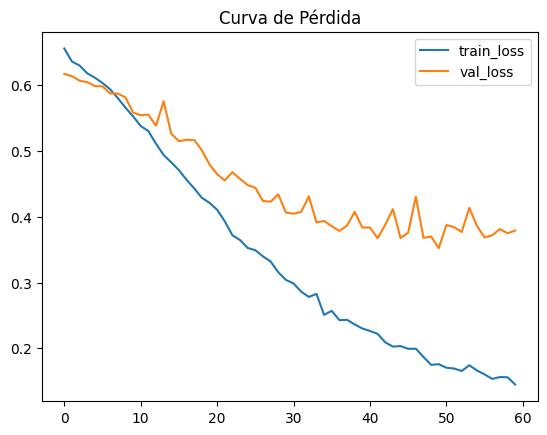

In [34]:
import matplotlib.pyplot as plt

# Supongamos que 'history' contiene el historial de entrenamiento del modelo
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Visualizar pérdida y precisión
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.title('Curva de Pérdida')
plt.show()


In [14]:
print(history.keys())


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


In [36]:
#plt.plot(history.historial_cargado['accuracy'], label='train_accuracy')
#plt.plot(history.historial_cargado['val_accuracy'], label='val_accuracy')
#plt.legend()
#plt.title('Curva de Precisión')
#plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Supongamos que 'y_pred' son las predicciones del modelo y 'y_true' son los verdaderos objetivos
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


NameError: name 'y_pred' is not defined

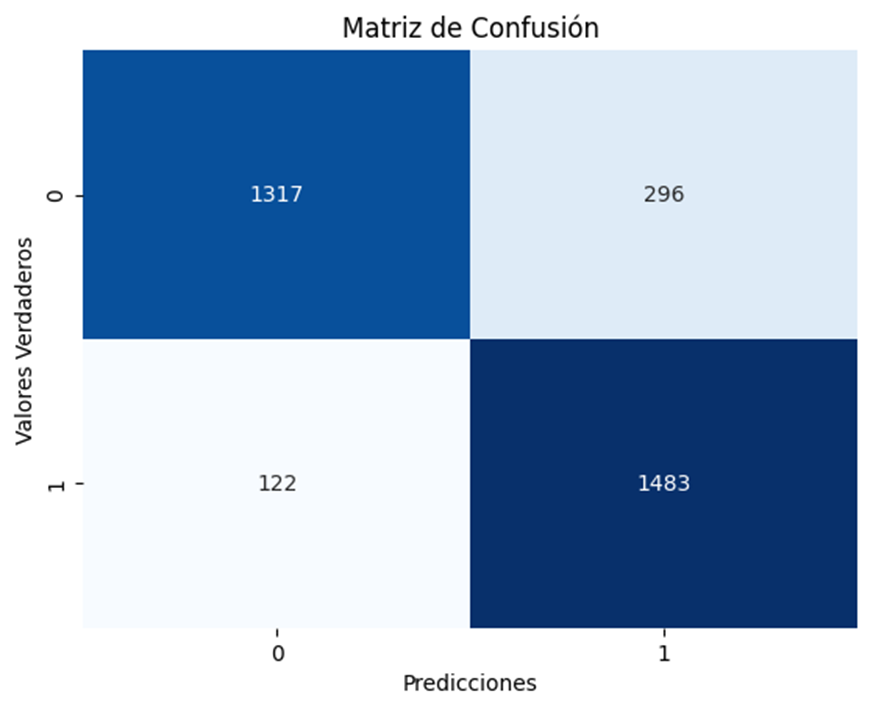

In [38]:
y_prob=model.predict(X_test)

 64/101 [==================>...........] - ETA: 0s

101/101 [==============================] - 0s 3ms/step


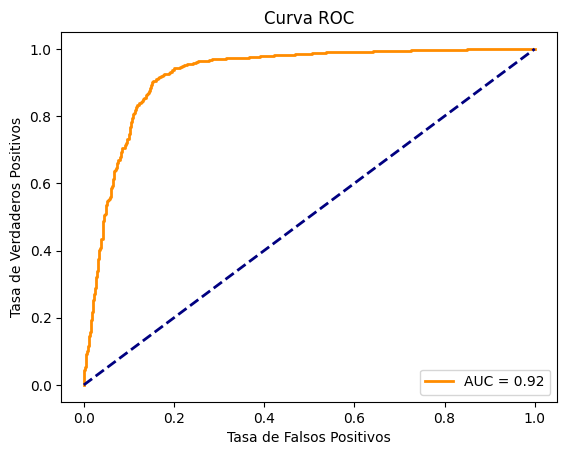

In [39]:
from sklearn.metrics import roc_curve, auc

# Supongamos que 'y_prob' son las probabilidades predichas por el modelo
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()
